<a href="https://colab.research.google.com/github/SatishY21/test1/blob/main/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the datase
df = pd.read_csv("video_id_info.csv", on_bad_lines='skip')

/tmp/ipython-input-2611701718.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("video_id_info.csv", on_bad_lines='skip')


In [3]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
## lets find out missing values in your data
df.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [5]:
## drop missing values as we have very few & lets update dataframe as well..
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


### Perform Sentiment Analysis

In [7]:
#Sentiment analysis is a way for computers to understand and analyze the emotions expressed in text, like whether it's positive, negative, or neutral.
#eg.
# 1)This video is quite helpful-->Positive sentiment [0,1] more it will close to 1 it will positve sentiment
# 2)Uable to understand the topic -->Negative sentiment[-1]
# 3) I'm attending the lecture this afternoon.-->Neutral sentiment[0]

#The polarity range refers to the scale used in sentiment analysis to measure the degree of positivity or negativity in text, typically ranging from -1 to 1

In [8]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks
#!pip install textblob
import sys #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

In [9]:
from textblob import TextBlob

In [10]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [11]:
df.shape

(691374, 4)

In [12]:
#creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).
#This can be useful for working with a smaller subset of data, such as when you want to perform quick analyses or tests without using the entire dataset.

sample_df = df[0:1000]

In [13]:
sample_df.shape

(1000, 4)

In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️") # normal text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [15]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment #attribute

Sentiment(polarity=0.0, subjectivity=0.1)

In [16]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

### its a neutral sentence !

0.0

In [17]:
#performing sentiment for each row of comment_text'
#polarity = []--black list

#for comment in df['comment_text']:
    #TextBlob(comment).sentiment.polarity
    #polarity.append(TextBlob(comment).sentiment.polarity)

#if there is black txt then will get the exception error . so avoid the exception we have to use try exception block

#syntax
#try:
    # Code that might raise an exception
# except :
    # Code to handle the exception


In [18]:
polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [19]:
len(polarity)

691374

In [20]:
df['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [21]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


##  Wordcloud Analysis of your data

In [22]:
#Word cloud analysis is a visual representation technique that displays the most frequently occurring words in a text dataset

In [23]:
filter1 = df['polarity']==1
comments_positive=df[filter1]

In [24]:
filter2 = df['polarity']==-1
comments_negative= df[filter2]

In [25]:
#!pip install wordcloud
import sys
!{sys.executable} -m pip install wordcloud

In [26]:
from wordcloud import WordCloud , STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [27]:
set(STOPWORDS)
#turns the stopwords list into a unique collection of words for faster processing.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [28]:
df['comment_text']

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
...,...
691395,Лучшая
691396,qu'est ce que j'aimerais que tu viennes à Roan...
691397,Ven a mexico! 😍 te amo LP
691398,Islığı yeter...


In [29]:
type(df['comment_text'])

pandas.core.series.Series

In [30]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [31]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
#This line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words that don't carry significant meaning.

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

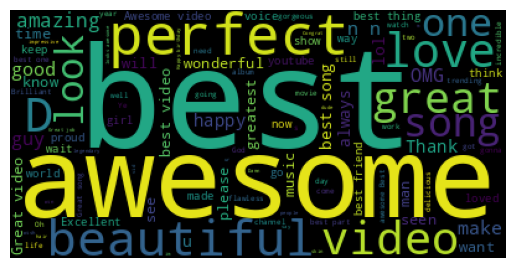

In [32]:
plt.imshow(wordcloud)
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library.
plt.axis('off')

### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [33]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [34]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

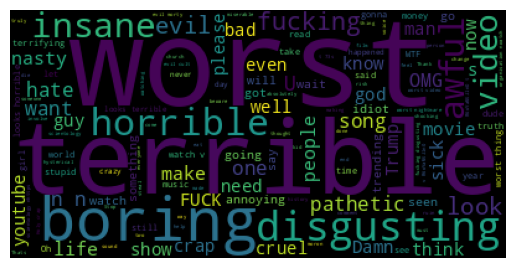

In [35]:
plt.imshow(wordcloud)
plt.axis('off')

In [36]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

##  Perform Emoji's Analysis

In [37]:
#!pip install emoji==2.10.1
import sys
!{sys.executable} -m pip install emoji==2.10.1
## 2.10.0 is a most stable version till date , hence installing this version makes sense !

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.4 MB/s eta 0:00:00


In [38]:
import emoji

In [39]:
emoji.__version__

'2.10.1'

In [40]:
df['comment_text'].head(6)

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
5,#1 on trending AYYEEEEE


In [41]:
comment = 'trending 😉'

In [42]:
[char for char in comment if char in emoji.EMOJI_DATA]
#The code snippet you provided is a list comprehension that filters out characters from a string (comment) if they are present in the emoji.
#EMOJI_DATA dictionary. It's a way to extract emojis from a text string.

['😉']

In [43]:
## lets try to write above code in a more simpler & readable way :
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

emoji_list

['😉']

In [44]:
all_emojis_list = []

for comment in df['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [45]:
all_emojis_list[0:10]# 1st 10 emojis

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [46]:
### NOw we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [47]:
from collections import Counter # collection package

In [48]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [49]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [50]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [51]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [52]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [53]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [54]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [55]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [56]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [57]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [58]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [59]:
pip install plotly

In [60]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [61]:
import plotly.express as px
import plotly.graph_objs as go

In [62]:
trace = go.Bar(x=emojis , y=freqs)

In [63]:
fig = go.Figure(data=[trace])

In [64]:
fig.show(renderer="colab")

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

##  Collect Entire data of Youtube !

In [65]:
import os

In [66]:
!unzip YT_additional_data.zip

Archive:  YT_additional_data.zip
   creating: YT_additional_data/
  inflating: YT_additional_data/CAvideos.csv  
  inflating: YT_additional_data/CA_category_id.json  
  inflating: YT_additional_data/DEvideos.csv  
  inflating: YT_additional_data/DE_category_id.json  
  inflating: YT_additional_data/FRvideos.csv  
  inflating: YT_additional_data/FR_category_id.json  
  inflating: YT_additional_data/GBvideos.csv  
  inflating: YT_additional_data/GB_category_id.json  
  inflating: YT_additional_data/INvideos.csv  
  inflating: YT_additional_data/IN_category_id.json  
  inflating: YT_additional_data/JPvideos.csv  
  inflating: YT_additional_data/JP_category_id.json  
  inflating: YT_additional_data/KRvideos.csv  
  inflating: YT_additional_data/KR_category_id.json  
  inflating: YT_additional_data/MXvideos.csv  
  inflating: YT_additional_data/MX_category_id.json  
  inflating: YT_additional_data/README.md  
  inflating: YT_additional_data/RUvideos.csv  
  inflating: YT_additional_data/RU_

In [67]:
# This path now exists in Colab because you unzipped the file
files = os.listdir('/content/YT_additional_data/')

print(files)

['JPvideos.csv', 'MX_category_id.json', 'GB_category_id.json', 'KRvideos.csv', 'INvideos.csv', 'DEvideos.csv', 'KR_category_id.json', 'CA_category_id.json', 'US_category_id.json', 'JP_category_id.json', 'FRvideos.csv', 'DE_category_id.json', 'FR_category_id.json', 'IN_category_id.json', 'USvideos.csv', 'README.md', 'CAvideos.csv', 'RUvideos.csv', 'RU_category_id.json', 'MXvideos.csv', 'GBvideos.csv']


In [68]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]
files_csv

['JPvideos.csv',
 'KRvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'MXvideos.csv',
 'GBvideos.csv']

In [69]:
#while colllecting the data if you encounter any kind of warning its always good to consider a warning modules.
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [71]:
#all the csv file i have to store in big data frame
import pandas as pd
import os

# 1. Use the correct path for the folder inside Colab
path = '/content/YT_additional_data/'

# 2. Get the list of CSV files from that path
files_csv = [file for file in os.listdir(path) if file.endswith('.csv')]

# 3. Create an empty DataFrame to store all the data
full_df = pd.DataFrame()

# 4. Loop through the files, read them, and combine them
for file in files_csv:
    file_path = os.path.join(path, file)
    try:
        current_df = pd.read_csv(file_path, encoding='iso-8859-1')
        full_df = pd.concat([full_df, current_df], ignore_index=True)
    except Exception as e:
        print(f"Error reading {file}: {e}")

print("All files have been successfully combined!")
print(full_df.head())

All files have been successfully combined!
      video_id trending_date  \
0  5ugKfHgsmYw      18.07.02   
1  ohObafdd34Y      18.07.02   
2  aBr2kKAHN6M      18.07.02   
3  5wNnwChvmsQ      18.07.02   
4  B7J47qFvdsk      18.07.02   

                                               title  \
0  é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...   
1  ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...   
2                              Live Views of Starman   
3  æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®åã­ã£ã...   
4  æ¦®åå¥ããè¡æã®æ­»ãã ãµãï¼æ ç...   

                    channel_title  category_id              publish_time  \
0  æäºéä¿¡æ åã»ã³ã¿ã¼           25  2018-02-06T03:04:37.000Z   
1  ç¥è°·ãããª Kamiya Erina 2            1  2018-02-06T04:01:56.000Z   
2                          SpaceX           28  2018-02-06T21:38:22.000Z   
3           ã¢ã·ã¿ãã¯ãã¤           25  2018-02-06T06:08:49.000Z   
4           ã·ãããã¥ãã¤            1 

In [72]:
full_df.shape

(375942, 16)

In [ ]:
full_df.duplicated() #True will represent the duplicate rows and  False represent the uniques rows.

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [73]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [74]:
full_df = full_df.drop_duplicates() ## lets drop duplicate rows ..

In [75]:
full_df.shape

(339525, 16)

In [77]:
#### a... Storing data into csv ..
# Select the first 1000 rows and save them to a new CSV file in Colab
full_df[0:1000].to_csv('youtube_sample.csv', index=False)

print("Successfully created youtube_sample.csv!")

Successfully created youtube_sample.csv!


In [78]:
#### b... Storing data into json
# Select the first 1000 rows and save them to a new JSON file in Colab
full_df[0:1000].to_json('youtube_sample.json')

print("Successfully created youtube_sample.json!")

Successfully created youtube_sample.json!


##  Which Category has the maximum likes ?

In [79]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...


In [80]:
full_df['category_id'].unique() #returns an array containing the unique values of the category_id

array([25,  1, 28, 22, 23, 19, 15, 24, 26,  2, 17, 29, 10, 20, 27, 43, 44,
       30])

In [82]:
## lets read json file ..
import pandas as pd

# Use the path to the file inside the Colab environment
file_path = '/content/YT_additional_data/US_category_id.json'

json_df = pd.read_json(file_path)

print(json_df.head())

                                kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...  


In [83]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [84]:
json_df['items'][0]

### retrieves the first item (index 0) from the 'items' column of the DataFrame

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [85]:
#now i want id and title in a dictionary
cat_dict = {} #empty dict


for item in json_df['items'].values:     #values here return the array representation
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item['id'])] = item['snippet']['title'] # snippet here is the sub dict so we have to write this way  ['snippet']['title']

In [86]:
cat_dict


{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [89]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df['category_name']
#maps category IDs in the 'category_id' column of full_df DataFrame to their corresponding category titles using the cat_dict dictionary.

,category_name
0,News & Politics
1,Film & Animation
2,Science & Technology
3,News & Politics
4,Film & Animation
...,...
375937,Music
375938,Music
375939,Music
375940,Entertainment


In [90]:
full_df.head(4) #now you can notice that you have a new feature which is a category name

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,News & Politics
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,Film & Animation
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,Science & Technology
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,News & Politics


In [91]:
#which category has the maximum likes ?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'News & Politics'),
  Text(1, 0, 'Film & Animation'),
  Text(2, 0, 'Science & Technology'),
  Text(3, 0, 'People & Blogs'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Travel & Events'),
  Text(6, 0, 'Pets & Animals'),
  Text(7, 0, 'Entertainment'),
  Text(8, 0, 'Howto & Style'),
  Text(9, 0, 'Autos & Vehicles'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Nonprofits & Activism'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Gaming'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Movies')])

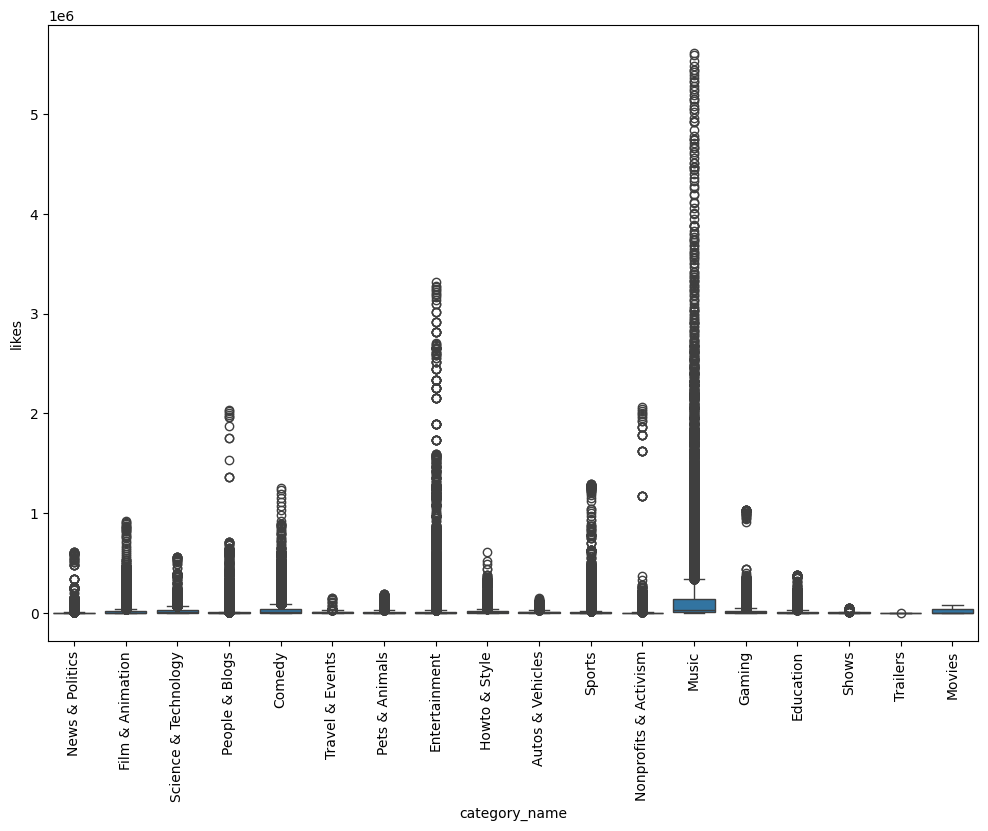

In [92]:
plt.figure(figsize=(12,8))#Creates a new figure with a specified size of 12 inches by 8 inches for better visualization.
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')#Rotates the x-axis labels vertically for better readability.

## Find out whether audience is engaged or not
like rate ,dislike , comment_count_rate

In [ ]:
(full_df['likes']/full_df['views'])*100

0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
375936     7.820293
375938     5.635623
375939     4.507286
375940     3.408645
375941     3.464728
Length: 339525, dtype: float64

In [93]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [94]:
full_df.columns # three things added 'like_rate','dislike_rate', 'comment_count_rate'

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

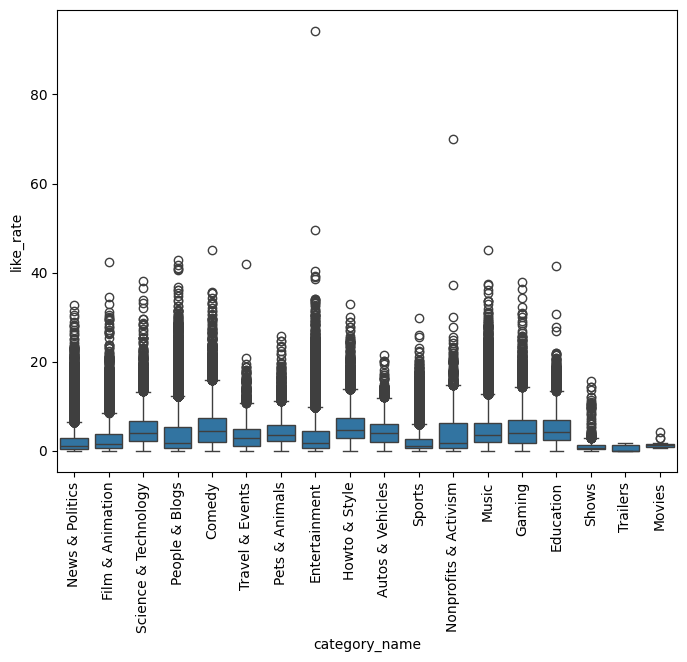

In [95]:
#creating box plot for like rate
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

### Analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

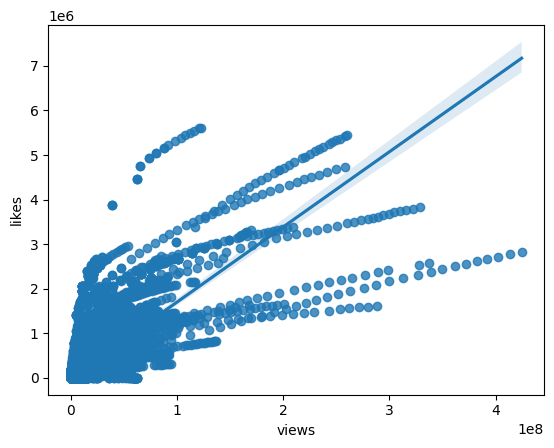

In [96]:
#using Regression plot
#regression plot is nothing but it is the combination of a scatter plot + a regression kine on top of that
sns.regplot(x='views' , y='likes' , data = full_df)

In [97]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [98]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,188085,591,189
1,90929,442,88
2,6408303,165892,2331
3,96255,1165,277
4,108408,1336,74
...,...,...,...
375937,25066952,268088,12783
375938,1492219,61998,13781
375939,29641412,394830,8892
375940,14317515,151870,45875


In [99]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

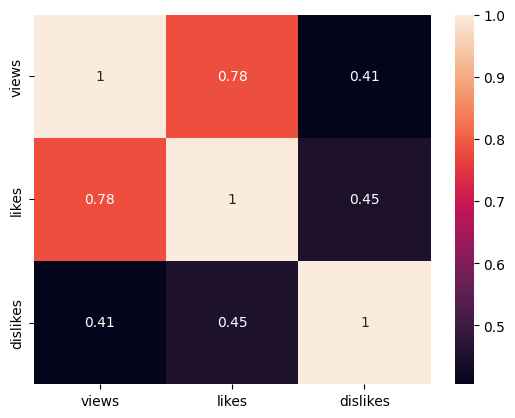

In [100]:
#Now if you want to showcase this correlation table in a vsiualized way , you can use the heatmap
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)
#When annot=True, numerical values are displayed on the heatmap cells

##  Which channels have the largest number of trending videos?

In [101]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,News & Politics,0.314220,0.100486,0.000000
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,Film & Animation,0.486094,0.096779,0.191358
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,Science & Technology,2.588704,0.036375,0.046908
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,News & Politics,1.210327,0.287777,0.566204
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...,Film & Animation,1.232381,0.068261,0.185411
5,OIDfjdGERr8,18.07.02,æè³ãã¤ãããã®æ­»å ãå å¤«ã»åç...,æ¿ç½ï¼ï¼ã¹ã¼ãã¼è¸è½ãã£ã³ãã«ï...,22,2018-02-06T03:27:10.000Z,"æè³ãã¤ã|""å «æ¨äºå¸å­""|""æ²³éæ¯å­...",193593,0,0,53,https://i.ytimg.com/vi/OIDfjdGERr8/default.jpg,False,True,False,Twitterå§ãã¾ããï¼\n\nç»é²ãããã...,People & Blogs,0.000000,0.000000,0.027377


In [102]:
full_df['channel_title'].value_counts()
# returns the count of unique values in a Series, providing a frequency distribution of the values.

,count
channel_title,
The Late Show with Stephen Colbert,710
WWE,643
Late Night with Seth Meyers,592
TheEllenShow,555
Jimmy Kimmel Live,528
...,...
Noveball,1
KinoCheck Kids,1
DKB Handball-Bundesliga,1


In [103]:
### lets obtain above frequency table using groupby approach :
full_df.groupby(['channel_title']).size()

,0
channel_title,
! ì¸ìì ë¬´ì¨ì¼ì´,7
!!8æã ãé¢ç½ãã¿å¤§éå,1
!BTSã»TWICE ã¾ã¨ã,1
!Los amorosos ViralesÂ¡,2
!t Live,3
...,...
ï¼åã§ã§ãã DIY,5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½,2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã,1


In [104]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()


#reset_index() is a pandas DataFrame method used to reset the index of a DataFrame.
#It converts the index labels into a new column and assigns a default numeric index to the DataFrame.

In [105]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [106]:
cdf = cdf.rename(columns={0:'total_videos'})

In [107]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [108]:
import plotly.express as px

In [109]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

##  Which channels have the largest number of trending videos?

In [110]:
!zip -r my_youtube_project.zip Youtube.ipynb youtube_sample.csv youtube_sample.json wordcloud.png YT_additional_data/

	zip warning: name not matched: Youtube.ipynb
	zip warning: name not matched: wordcloud.png
  adding: youtube_sample.csv (deflated 71%)
  adding: youtube_sample.json (deflated 85%)
  adding: YT_additional_data/ (stored 0%)
  adding: YT_additional_data/JPvideos.csv (deflated 60%)
  adding: YT_additional_data/MX_category_id.json (deflated 83%)
  adding: YT_additional_data/GB_category_id.json (deflated 83%)
  adding: YT_additional_data/KRvideos.csv (deflated 59%)
  adding: YT_additional_data/INvideos.csv (deflated 64%)
  adding: YT_additional_data/DEvideos.csv (deflated 59%)
  adding: YT_additional_data/KR_category_id.json (deflated 83%)
  adding: YT_additional_data/CA_category_id.json (deflated 83%)
  adding: YT_additional_data/US_category_id.json (deflated 83%)
  adding: YT_additional_data/JP_category_id.json (deflated 83%)
  adding: YT_additional_data/FRvideos.csv (deflated 59%)
  adding: YT_additional_data/DE_category_id.json (deflated 83%)
  adding: YT_additional_data/FR_category_id.

In [111]:
!ls

my_youtube_project.zip	youtube_sample.csv   YT_additional_data.zip
sample_data		youtube_sample.json
video_id_info.csv	YT_additional_data
